# Exploratory Data Analysis - read dataframes

In [1]:
# imports

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

%matplotlib inline

In [2]:
# read the CSV files

df = pd.read_csv('../clean_data/hospitals_by_county.csv')

In [3]:
df_mask = pd.read_csv('../clean_data/Cases_Normalized_per_100k.csv')

## mask.csv basic inspection

In [4]:
# check the size of dataframes  
df.shape

(16909, 9)

In [5]:
# check how many null values are in each

df.isnull().sum()


county                                     0
todays_date                                0
hospitalized_covid_confirmed_patients      0
hospitalized_suspected_covid_patients      0
hospitalized_covid_patients                0
all_hospital_beds                        215
icu_covid_confirmed_patients               7
icu_suspected_covid_patients               7
icu_available_beds                       215
dtype: int64

In [6]:
# check how many counties we have

df_mask.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18124 entries, 0 to 18123
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   county                                   18124 non-null  object 
 1   totalcountconfirmed                      18124 non-null  float64
 2   totalcountdeaths                         18124 non-null  float64
 3   newcountconfirmed                        18124 non-null  int64  
 4   newcountdeaths                           18124 non-null  int64  
 5   date                                     18124 non-null  object 
 6   NEVER                                    18124 non-null  float64
 7   RARELY                                   18124 non-null  float64
 8   SOMETIMES                                18124 non-null  float64
 9   FREQUENTLY                               18124 non-null  float64
 10  ALWAYS                                   18124

In [7]:
df.head()

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Plumas,2020-03-29,0.0,1.0,1.0,NaN,0.0,1.0,NaN
1,Tehama,2020-03-29,0.0,0.0,0.0,308.0,0.0,0.0,2.0
2,Glenn,2020-03-29,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Mono,2020-03-29,0.0,1.0,1.0,308.0,0.0,0.0,2.0
4,Marin,2020-03-29,7.0,13.0,20.0,493.0,2.0,6.0,11.0


In [8]:
df['date'] = pd.to_datetime(df['todays_date'])
df_mask['date'] = pd.to_datetime(df_mask['date'])

In [9]:
df = df.sort_values(['county', 'todays_date'])
df.set_index(['county', 'date'])

todays_date  hospitalized_covid_confirmed_patients  \
county  date                                                            
Alameda 2020-03-29  2020-03-29                                   36.0   
        2020-03-30  2020-03-30                                   59.0   
        2020-03-31  2020-03-31                                   56.0   
        2020-04-01  2020-04-01                                   52.0   
        2020-04-02  2020-04-02                                   57.0   
...                        ...                                    ...   
Yuba    2021-01-20  2021-01-20                                   44.0   
        2021-01-21  2021-01-21                                   42.0   
        2021-01-22  2021-01-22                                   45.0   
        2021-01-23  2021-01-23                                   49.0   
        2021-01-24  2021-01-24                                   53.0   

                    hospitalized_suspected_covid_patients  \
county  date                                                
Alameda 2020-03-29                                   91.0   
        2020-03-30                                   89.0   
        2020-03-31                                   94.0   
        2020-04-01                                   76.0   
        2020-04-02                                   76.0   
...                                                   ...   
Yuba    2021-01-20                                    0.0   
        2021-01-21                                    2.0   
        2021-01-22                                    0.0   
        2021-01-23                                    0.0   
        2021-01-24                                    0.0   

                    hospitalized_covid_patients  all_hospital_beds  \
county  date                                                         
Alameda 2020-03-29                        127.0             2725.0   
        2020-03-30                        148.0             3283.0   
        2020-03-31                        150.0             1857.0   
        2020-04-01                        128.0             2456.0   
        2020-04-02                        133.0             2580.0   
...                                         ...                ...   
Yuba    2021-01-20                         44.0              261.0   
        2021-01-21                         44.0              261.0   
        2021-01-22                         45.0              261.0   
        2021-01-23                         49.0              261.0   
        2021-01-24                         53.0              261.0   

                    icu_covid_confirmed_patients  \
county  date                                       
Alameda 2020-03-29                          20.0   
        2020-03-30                          27.0   
        2020-03-31                          27.0   
        2020-04-01                          27.0   
        2020-04-02                          29.0   
...                                          ...   
Yuba    2021-01-20                          16.0   
        2021-01-21                          13.0   
        2021-01-22                          12.0   
        2021-01-23                          12.0   
        2021-01-24                          12.0   

                    icu_suspected_covid_patients  icu_available_beds  
county  date                                                          
Alameda 2020-03-29                          16.0               119.0  
        2020-03-30                          18.0               146.0  
        2020-03-31                          17.0                77.0  
        2020-04-01                          15.0               106.0  
        2020-04-02                          17.0               112.0  
...                                          ...                 ...  
Yuba    2021-01-20                           0.0                 2.0  
        2021-01-21                           0.0

In [10]:
merged = pd.merge(df, df_mask[['county', 'date', 'population']], on=['county', 'date'])

In [11]:
merged.drop(columns=['todays_date'])

,county,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,date,population
0,Alameda,36.0,91.0,127.0,2725.0,20.0,16.0,119.0,2020-03-29,1671329
1,Alameda,59.0,89.0,148.0,3283.0,27.0,18.0,146.0,2020-03-30,1671329
2,Alameda,56.0,94.0,150.0,1857.0,27.0,17.0,77.0,2020-03-31,1671329
3,Alameda,52.0,76.0,128.0,2456.0,27.0,15.0,106.0,2020-04-01,1671329
4,Alameda,57.0,76.0,133.0,2580.0,29.0,17.0,112.0,2020-04-02,1671329
...,...,...,...,...,...,...,...,...,...,...
16898,Yuba,44.0,0.0,44.0,261.0,16.0,0.0,2.0,2021-01-20,78668
16899,Yuba,42.0,2.0,44.0,261.0,13.0,0.0,2.0,2021-01-21,78668
16900,Yuba,45.0,0.0,45.0,261.0,12.0,0.0,2.0,2021-01-22,78668
16901,Yuba,49.0,0.0,49.0,261.0,12.0,0.0,3.0,2021-01-23,78668


In [12]:
df = merged.copy()

In [13]:
df['icu_covid_patients'] = df['icu_covid_confirmed_patients'] + df['icu_suspected_covid_patients']

In [14]:

# make new columns normalized to population
# popular metrics used lists numbers per 100K population, so follow the same method

df['hospitalizedper100k'] = df['hospitalized_covid_patients']/df['population']*100000
df['ICUpatientsper100k'] = df['icu_covid_patients']/df['population']*100000
df['hospitalbedavailable100k'] = df['all_hospital_beds']/df['population']*100000
df['icubedavailableper100k'] = df['icu_available_beds']/df['population']*100000


In [15]:
# daily cases fluctuate a lot
# added 7-day rolling average columns to smooth out the variations 

df_bycounty = pd.DataFrame(df.groupby('county', sort=False)['hospitalizedper100k'].rolling(7).mean())
df_bycounty.set_index(keys=df.index, inplace=True)
df_bycounty.tail(30)
df_bycounty.columns = ['7dayrollingavg_hospitalizedper100k']

merged = pd.merge(df, df_bycounty, left_index=True, right_index=True)



In [16]:
# repeat for daily deaths count
# pd. merge used to avoid conflict with groupby().rolling function 


df_bycounty2 = pd.DataFrame(df.groupby('county', sort=False)['ICUpatientsper100k'].rolling(7).mean())
df_bycounty2.set_index(keys=df.index, inplace=True)

df_bycounty2.columns = ['7dayrollingavg_ICUpatientsper100k']

merged2 = pd.merge(merged, df_bycounty2, left_index=True, right_index=True)


df = merged2.copy()
df.tail(30)

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,date,population,icu_covid_patients,hospitalizedper100k,ICUpatientsper100k,hospitalbedavailable100k,icubedavailableper100k,7dayrollingavg_hospitalizedper100k,7dayrollingavg_ICUpatientsper100k
16873,Yuba,2020-12-26,65.0,2.0,67.0,261.0,13.0,1.0,2.0,2020-12-26,78668,14.0,85.168048,17.796309,331.774038,2.542330,77.541059,12.893244
16874,Yuba,2020-12-27,68.0,1.0,69.0,261.0,14.0,0.0,1.0,2020-12-27,78668,14.0,87.710378,17.796309,331.774038,1.271165,79.538603,13.619624
16875,Yuba,2020-12-28,67.0,0.0,67.0,261.0,14.0,0.0,1.0,2020-12-28,78668,14.0,85.168048,17.796309,331.774038,1.271165,80.446578,14.527599
16876,Yuba,2020-12-29,72.0,0.0,72.0,261.0,18.0,0.0,1.0,2020-12-29,78668,18.0,91.523872,22.880968,331.774038,1.271165,82.080933,16.161954
16877,Yuba,2020-12-30,73.0,25.0,98.0,261.0,18.0,0.0,0.0,2020-12-30,78668,18.0,124.574160,22.880968,331.774038,0.000000,89.344733,18.159499
16878,Yuba,2020-12-31,69.0,23.0,92.0,261.0,17.0,0.0,1.0,2020-12-31,78668,17.0,116.947170,21.609803,331.774038,1.271165,95.700557,19.612258
16879,Yuba,2021-01-01,69.0,17.0,86.0,261.0,20.0,0.0,1.0,2021-01-01,78668,20.0,109.320181,25.423298,331.774038,1.271165,100.058837,20.883423
16880,Yuba,2021-01-02,69.0,12.0,81.0,261.0,20.0,0.0,1.0,2021-01-02,78668,20.0,102.964357,25.423298,331.774038,1.271165,102.601167,21.972993
16881,Yuba,2021-01-03,71.0,7.0,78.0,261.0,18.0,0.0,1.0,2021-01-03,78668,18.0,99.150862,22.880968,331.774038,1.271165,104.235521,22.699373
16882,Yuba,2021-01-04,68.0,2.0,70.0,261.0,17.0,1.0,1.0,2021-01-04,78668,18.0,88.981543,22.880968,331.774038,1.271165,104.780306,23.425753


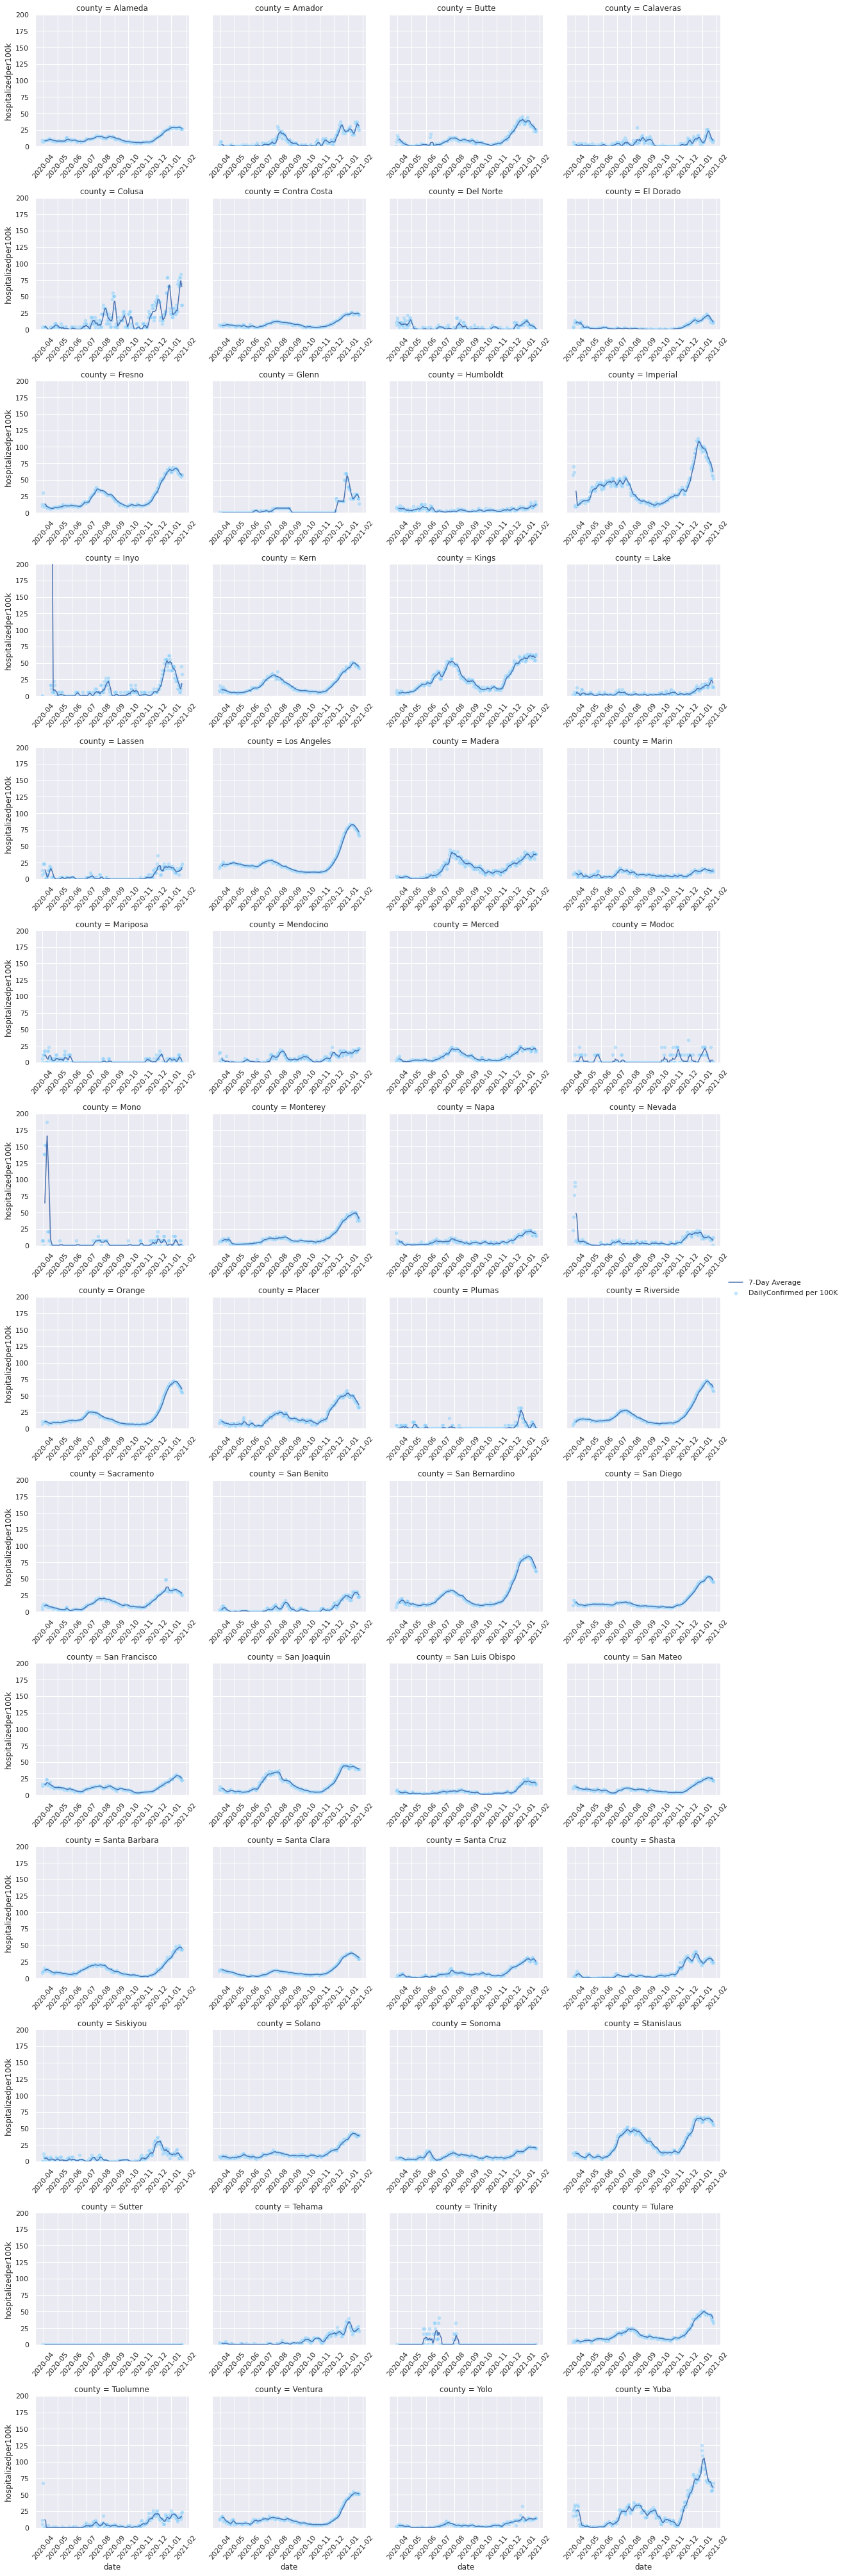

In [17]:
# graph the daily hospitalized (total of confirmed & suspected) normalized by 100k population 
# light blue dots = normalized daily count
# dark blue line = 7-day rolling average


sns.set_theme(style="darkgrid")

g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True, ylim=(0,200))
g.map(sns.lineplot, "date", '7dayrollingavg_hospitalizedper100k', label='7-Day Average')
g.map(sns.scatterplot, "date", 'hospitalizedper100k', alpha=.5, color='lightskyblue', label='DailyConfirmed per 100K')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()
g.add_legend()
g.savefig('../images/7_day_all_counties_hospitalized.png');

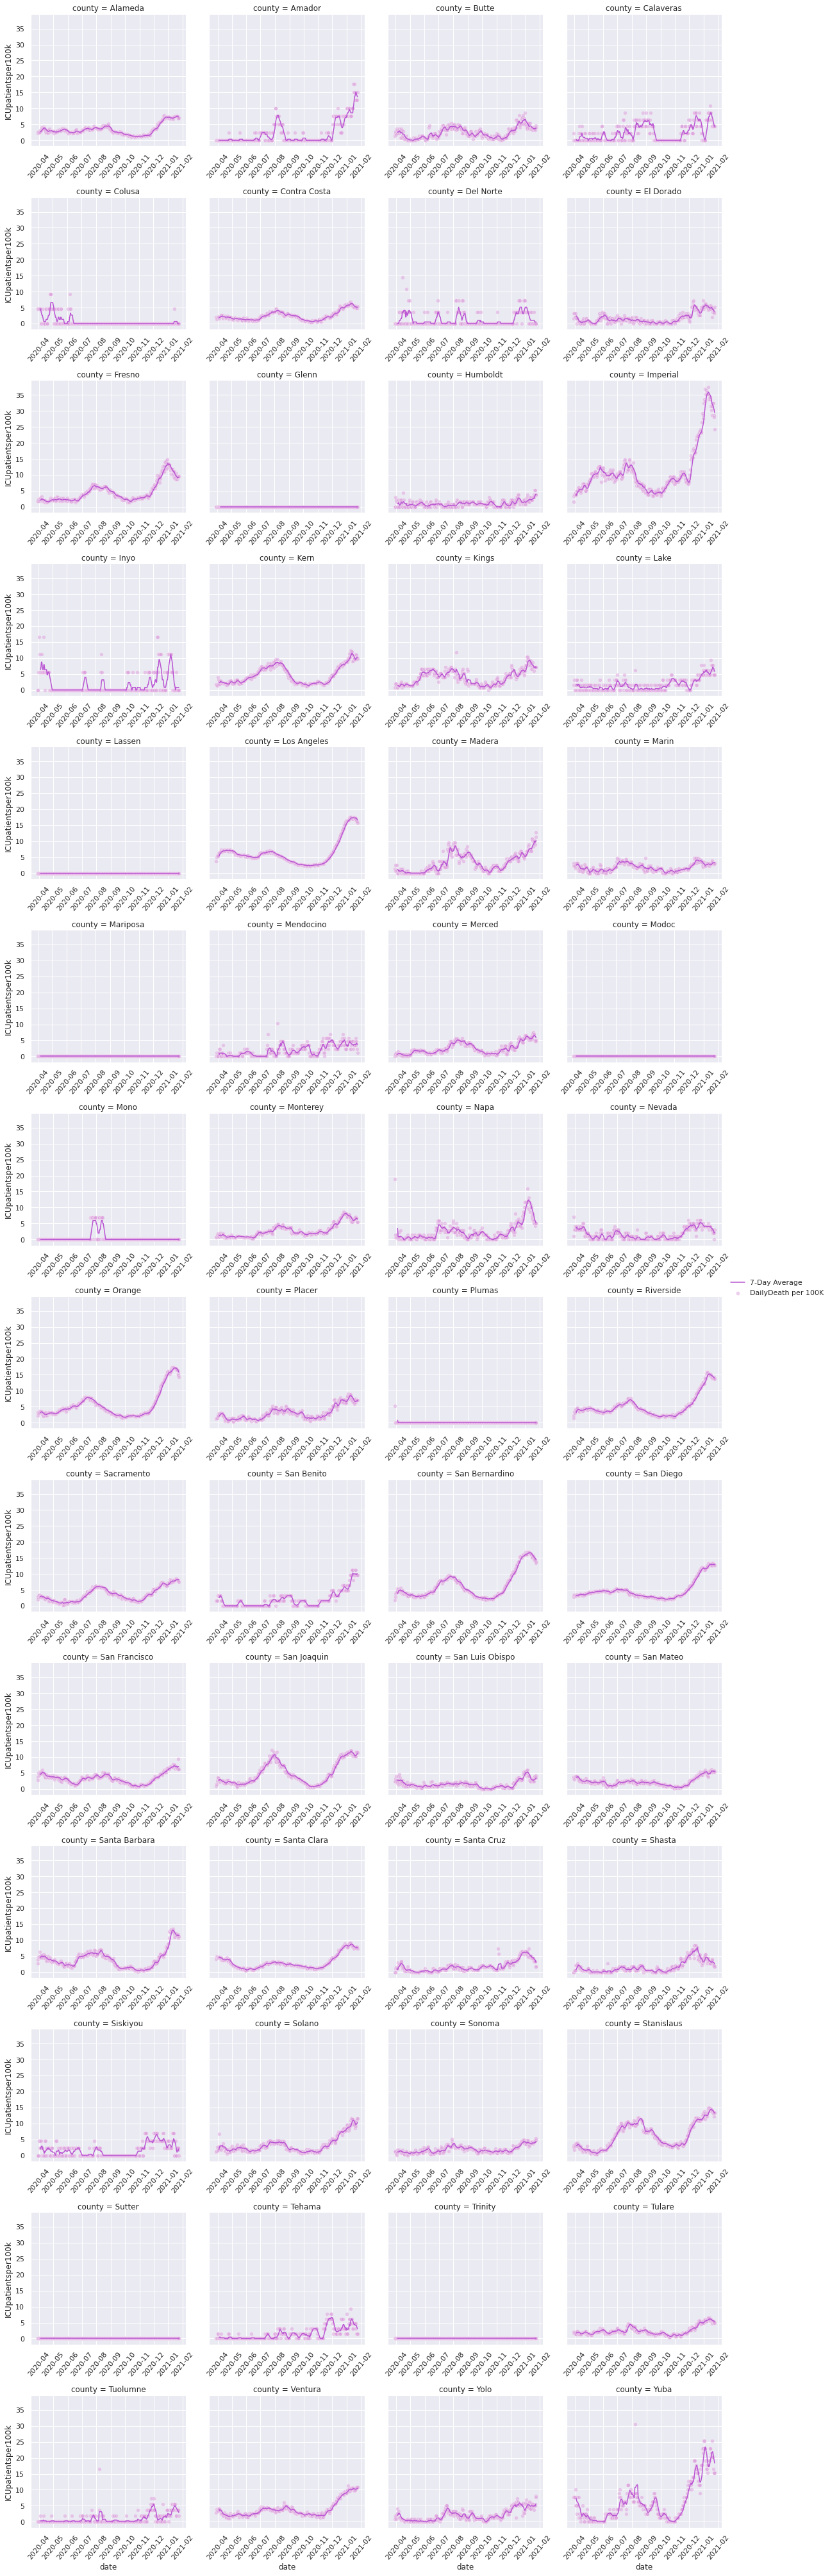

In [18]:
# graph the daily ICU patients normalized by 100k population 
# light pink dots = normalized 
# dark purple line = 7-day rolling average

g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True)
g.map(sns.lineplot, "date", '7dayrollingavg_ICUpatientsper100k', color='mediumorchid', label='7-Day Average')
g.map(sns.scatterplot, "date", 'ICUpatientsper100k', alpha=.5, color='plum', label='DailyDeath per 100K')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()

g.add_legend()
g.savefig('../images/7_day_ICU_all_counties.png');